In [1]:
import tensorflow as tf   
import numpy as np 
import pandas as pd 

# 1. Get the Data 

In [2]:
data = pd.read_csv("../datasets/attribute_set/train_val_data_fine_grained_all.csv", index_col=0) 
data.head() 

,paths,floral,graphic,striped,embroidered,pleated,solid,lattice,long_sleeve,short_sleeve,...,no_neckline,denim,chiffon,cotton,leather,faux,knit,tight,loose,conventional
0,../datasets/big_ds/img-001/img/Sweet_Crochet_B...,0,0,0,1,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1
1,../datasets/big_ds/img-001/img/Classic_Pencil_...,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,1,0,0
2,../datasets/big_ds/img-001/img/Strapless_Diamo...,0,1,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
3,../datasets/big_ds/img-001/img/Mid-Rise_-_Acid...,0,0,0,0,0,1,0,0,0,...,1,1,0,0,0,0,0,1,0,0
4,../datasets/big_ds/img-001/img/Zippered_Single...,0,0,0,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,1


## 1.1 Segment the Data 

In [3]:
desen_group = data.loc[:, [
                            "floral" ,
                            "graphic" ,
                            "striped",
                            "embroidered",
                            "solid" ,
                            "lattice" ,
                            "pleated",]] 
desen_group["group"] = np.argmax(desen_group.iloc[:, :].to_numpy(), axis=1) 
desen_group_ids = dict([(col, i) for i, col in enumerate(desen_group.columns)])

print(desen_group_ids)

desen_group.head() 

{'floral': 0, 'graphic': 1, 'striped': 2, 'embroidered': 3, 'solid': 4, 'lattice': 5, 'pleated': 6, 'group': 7}


,floral,graphic,striped,embroidered,solid,lattice,pleated,group
0,0,0,0,1,0,0,0,3
1,0,0,0,0,1,0,0,4
2,0,1,0,0,0,0,0,1
3,0,0,0,0,1,0,0,4
4,0,0,0,0,1,0,0,4


In [4]:
elbise_durumu_group = data.loc[:, ["maxi_length", "mini_length", "no_dress"]]
elbise_durumu_group["group"] = np.argmax(elbise_durumu_group.iloc[:, :].to_numpy(), axis=1) 
elbise_durumu_group_ids = dict([(col, i) for i, col in enumerate(elbise_durumu_group.columns)])

print(elbise_durumu_group_ids)
elbise_durumu_group.head() 

{'maxi_length': 0, 'mini_length': 1, 'no_dress': 2, 'group': 3}


,maxi_length,mini_length,no_dress,group
0,0,0,1,2
1,0,0,1,2
2,1,0,0,0
3,0,0,1,2
4,0,0,1,2


In [5]:
yaka_group = data.loc[:, ["crew_neckline", "v_neckline" ,"square_neckline", "no_neckline"]] 
yaka_group["group"] = np.argmax(yaka_group.iloc[:, :].to_numpy(), axis=1) 
yaka_group_ids = dict([(col, i) for i, col in enumerate(yaka_group.columns)])

print(yaka_group_ids)
yaka_group.head() 

{'crew_neckline': 0, 'v_neckline': 1, 'square_neckline': 2, 'no_neckline': 3, 'group': 4}


,crew_neckline,v_neckline,square_neckline,no_neckline,group
0,0,0,0,1,3
1,0,0,0,1,3
2,0,0,0,1,3
3,0,0,0,1,3
4,0,1,0,0,1


In [6]:
kumas_group = data.loc[:, [
                            "denim", 
                            "cotton" ,
                            "chiffon",
                            "leather",
                            "faux",
                            "knit"]]  
kumas_group["group"] = np.argmax(kumas_group.iloc[:, :].to_numpy(), axis=1) 
kumas_group_ids = dict([(col, i) for i, col in enumerate(kumas_group.columns)])

print(kumas_group_ids)
kumas_group.head() 

{'denim': 0, 'cotton': 1, 'chiffon': 2, 'leather': 3, 'faux': 4, 'knit': 5, 'group': 6}


,denim,cotton,chiffon,leather,faux,knit,group
0,0,0,1,0,0,0,2
1,0,1,0,0,0,0,1
2,0,1,0,0,0,0,1
3,1,0,0,0,0,0,0
4,0,1,0,0,0,0,1


- To Do: might remove the 'conventional' column 

In [7]:
kalip_group = data.loc[:, [
    "tight", "loose", "conventional"
]]
kalip_group["group"] = np.argmax(kalip_group.iloc[:, :].to_numpy(), axis=1) 
kalip_group_ids = dict([(col, i) for i, col in enumerate(kalip_group.columns)])

print(kalip_group_ids)
kalip_group.head() 

{'tight': 0, 'loose': 1, 'conventional': 2, 'group': 3}


,tight,loose,conventional,group
0,0,0,1,2
1,1,0,0,0
2,0,0,1,2
3,1,0,0,0
4,0,0,1,2


In [8]:
kol_group = data.loc[:, ["long_sleeve", "short_sleeve", "sleeveless"]] 
kol_group["group"] = np.argmax(kol_group.iloc[:, :].to_numpy(), axis=1) 
kol_group_ids = dict([(col, i) for i, col in enumerate(kol_group.columns)])

print(kol_group_ids)
kol_group.head() 

{'long_sleeve': 0, 'short_sleeve': 1, 'sleeveless': 2, 'group': 3}


,long_sleeve,short_sleeve,sleeveless,group
0,0,0,1,2
1,0,0,1,2
2,0,0,1,2
3,0,0,1,2
4,1,0,0,0


## 1.2 Merge Segments and Create y_train, y_test 

In [9]:
data_segmented = pd.DataFrame() 

data_segmented["path"] = data.paths.copy() 
data_segmented["desen"] = desen_group.group.copy()  
data_segmented["elbise_durumu"] = elbise_durumu_group.group.copy()
data_segmented["yaka"] = yaka_group.group.copy()
data_segmented["kumas"] = kumas_group.group.copy() 
data_segmented["kalip"] = kalip_group.group.copy() 
data_segmented["kol"] = kol_group.group.copy() 

data_segmented.tail() 

,path,desen,elbise_durumu,yaka,kumas,kalip,kol
1995,../datasets/big_ds/img-001/img/Embroidered_Pea...,3,2,1,1,2,2
1996,../datasets/big_ds/img-001/img/Tasmanian_Devil...,4,2,1,5,2,0
1997,../datasets/big_ds/img-001/img/Lace-Sleeved_Ra...,2,2,0,1,2,0
1998,../datasets/big_ds/img-001/img/Floral_Mosaic_P...,0,2,1,1,2,1
1999,../datasets/big_ds/img-001/img/Sparkling_Ruche...,3,1,3,2,2,2


## 1.3 Data Split 

In [10]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(
    data_segmented.iloc[:, 0],
    data_segmented.iloc[:, 1:],
    test_size=0.25, 
    random_state=42
)

X_train.shape, X_test.shape 

((12000,), (4000,))

# 2. Custom Data Generator 

In [11]:
class CustomDataGenerator: 
    def __init__(self, Xy_train: pd.DataFrame, Xy_test: pd.DataFrame, shape=[224, 224]): 
        self.Xy_train = Xy_train 
        self.Xy_test = Xy_test 
        self.shape = shape 

        merged = pd.concat([Xy_train, Xy_test], axis=0) 
        
        self.desen_arr_max = merged["desen"].value_counts().index.max() 
        self.elbise_durumu_arr_max = merged["elbise_durumu"].value_counts().index.max() 
        self.yaka_arr_max = merged["yaka"].value_counts().index.max()
        self.kumas_arr_max = merged["kumas"].value_counts().index.max()
        self.kalip_arr_max = merged["kalip"].value_counts().index.max()   
        self.kol_arr_max = merged["kol"].value_counts().index.max()   

    def categorical_to_one_hot(self, arr: np.array, ds_max: int):
        zeros = np.zeros((arr.size, ds_max+1)) 
        zeros[np.arange(arr.size), arr] = 1 
        return zeros 
    
    def preprocess_image(self, img_path): 
        """
            Used to perform some minor preprocessing on the image before inputting into the network. 
        """
        img = tf.io.read_file(img_path)
        img = tf.image.decode_jpeg(img, channels=3) 
        img = tf.image.resize(img, self.shape) 
        return img.numpy() 

    def generate_image(self, is_training: bool, batch_size=32, epoch=5): 
        images, desen, elbise_durumu, yaka, kumas, kalip, kol = [], [], [], [], [], [], [] 
        
        if is_training:
            Xy = self.Xy_train 
        else: 
            Xy = self.Xy_test 

        while True: 
            for idx, row in Xy.iterrows():
                images.append(self.preprocess_image(row["path"]))
                desen.append(row["desen"])
                elbise_durumu.append(row["elbise_durumu"])
                yaka.append(row["yaka"])
                kumas.append(row["kumas"]) 
                kalip.append(row["kalip"]) 
                kol.append(row["kol"]) 

                if len(images) >= batch_size:
                    yield np.array(images), {"desen": self.categorical_to_one_hot(np.array(desen), self.desen_arr_max), 
                                             "elbise_durumu": self.categorical_to_one_hot(np.array(elbise_durumu), self.elbise_durumu_arr_max), 
                                             "yaka": self.categorical_to_one_hot(np.array(yaka), self.yaka_arr_max),
                                             "kumas": self.categorical_to_one_hot(np.array(kumas), self.kumas_arr_max),
                                             "kalip": self.categorical_to_one_hot(np.array(kalip), self.kalip_arr_max),
                                             "kol": self.categorical_to_one_hot(np.array(kol), self.kol_arr_max)}
                    images, desen, elbise_durumu, yaka, kumas, kalip, kol = [], [], [], [], [], [], [] 

            epoch = epoch - 1 
            if epoch == 0:
                break

# 3. Models 

In [12]:
SHAPE = (224, 224, 3)
DESEN_NR_NEURON = len(sorted(y_train.desen.value_counts().index)) 
ELBISE_DURUMU_NR_NEURON = len(sorted(y_train.elbise_durumu.value_counts().index))
YAKA_NR_NEURON = len(sorted(y_train.yaka.value_counts().index)) 
KUMAS_NR_NEURON = len(sorted(y_train.kumas.value_counts().index))
KALIP_NR_NEURON = len(sorted(y_train.kalip.value_counts().index))
KOL_NR_NEURON = len(sorted(y_train.kol.value_counts().index))   

## 3.1 Efficient Net B0  

In [13]:
eff_net = tf.keras.applications.EfficientNetB0(include_top=False) 
eff_net.trainable = False 

In [14]:
inputs = tf.keras.layers.Input(shape=(224, 224, 3)) 
x = eff_net(inputs) 
x = tf.keras.layers.GlobalAveragePooling2D()(x) 

output_desen = tf.keras.layers.Dense(DESEN_NR_NEURON, activation=tf.keras.activations.softmax, name="desen")(x)
output_elbise_durumu = tf.keras.layers.Dense(ELBISE_DURUMU_NR_NEURON, activation=tf.keras.activations.softmax, name="elbise_durumu")(x)
output_yaka = tf.keras.layers.Dense(YAKA_NR_NEURON, activation=tf.keras.activations.softmax, name="yaka")(x)
output_kumas = tf.keras.layers.Dense(KUMAS_NR_NEURON, activation=tf.keras.activations.softmax, name="kumas")(x)
output_kalip = tf.keras.layers.Dense(KALIP_NR_NEURON, activation=tf.keras.activations.softmax, name="kalip")(x)
output_kol = tf.keras.layers.Dense(KOL_NR_NEURON, activation=tf.keras.activations.softmax, name="kol")(x)

model_1 = tf.keras.Model(inputs=inputs, outputs=[output_desen, output_elbise_durumu, output_yaka, output_kumas, output_kalip, output_kol], name="Ayd-Net-2") 

In [ ]:
model_1.compile(optimizer=tf.keras.optimizers.Adam(), 
                loss={
                    'desen': 'categorical_crossentropy',
                    'elbise_durumu': 'categorical_crossentropy',
                    'yaka': 'categorical_crossentropy',
                    'kumas': 'categorical_crossentropy',
                    'kalip': 'categorical_crossentropy',
                    'kol': 'categorical_crossentropy'
                }, 
                metrics={
                    'desen': [tf.keras.metrics.Precision(name="precision_desen"), tf.keras.metrics.Recall(name="recall_desen")], 
                    'elbise_durumu': [tf.keras.metrics.Precision(name="precision_elbise_durumu"), tf.keras.metrics.Recall(name="recall_elbise_durumu")],
                    'yaka': [tf.keras.metrics.Precision(name="precision_yaka"), tf.keras.metrics.Recall(name="recall_yaka")],
                    'kumas': [tf.keras.metrics.Precision(name="precision_kumas"), tf.keras.metrics.Recall(name="recall_kumas")],
                    'kalip': [tf.keras.metrics.Precision(name="precision_kalip"), tf.keras.metrics.Recall(name="recall_kalip")],
                    'kol': [tf.keras.metrics.Precision(name="precision_kol"), tf.keras.metrics.Recall(name="recall_kol")]
                }) 

In [ ]:
checkpoint_path = "./checkpoints/multi_outputs_models/model_1/checkpoint-{epoch:01d}.ckpt" 
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True,
                                                         save_best_only=False,
                                                         verbose=1) 

In [ ]:
Xy_train = pd.concat([X_train, y_train], axis=1)
Xy_test = pd.concat([X_test, y_test], axis=1)
data_gen = CustomDataGenerator(Xy_train, Xy_test)
epoch = 20 
batch_size = 32 

model_1_history = model_1.fit(
            data_gen.generate_image(True, batch_size=batch_size, epoch=epoch), 
            steps_per_epoch=np.floor(len(Xy_train) / batch_size), 
            epochs=epoch, 
            validation_data=data_gen.generate_image(False, batch_size=batch_size, epoch=epoch), 
            validation_steps=np.floor(len(Xy_test) / batch_size), 
            callbacks=[checkpoint_callback])

<Axes: >

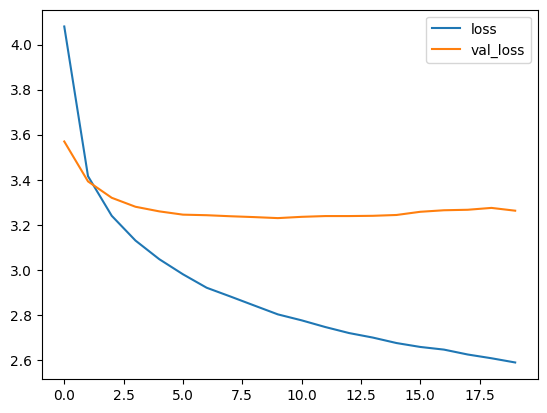

In [ ]:
hist_df = pd.DataFrame(model_1_history.history) 
hist_df.loc[:, ["loss", "val_loss"]].plot() 

<Axes: >

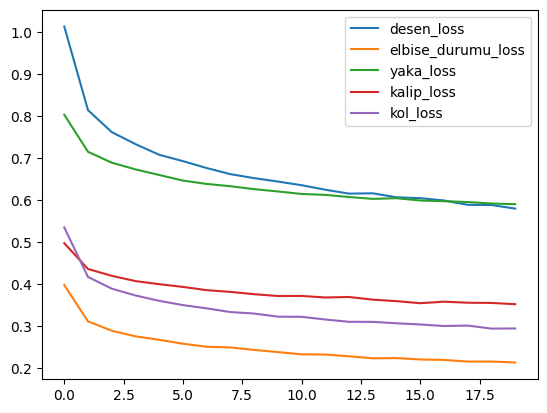

In [ ]:
hist_df[["desen_loss", "elbise_durumu_loss", "yaka_loss", "kalip_loss", "kol_loss"]].plot() 

## 3.2 Efficient Net B0 With Regularization 

In [ ]:
eff_net = tf.keras.applications.EfficientNetB0(include_top=False) 
eff_net.trainable = False 

In [ ]:
inputs = tf.keras.layers.Input(shape=(224, 224, 3)) 
x = eff_net(inputs) 
x = tf.keras.layers.GlobalAveragePooling2D()(x) 

kernel_regularizer = tf.keras.regularizers.l2(0.01)

output_desen = tf.keras.layers.Dense(DESEN_NR_NEURON, activation=tf.keras.activations.softmax, kernel_regularizer = kernel_regularizer,  name="desen")(x)
output_elbise_durumu = tf.keras.layers.Dense(ELBISE_DURUMU_NR_NEURON, activation=tf.keras.activations.softmax, kernel_regularizer = kernel_regularizer,  name="elbise_durumu")(x)
output_yaka = tf.keras.layers.Dense(YAKA_NR_NEURON, activation=tf.keras.activations.softmax,kernel_regularizer = kernel_regularizer,  name="yaka")(x)
output_kumas = tf.keras.layers.Dense(KUMAS_NR_NEURON, activation=tf.keras.activations.softmax,kernel_regularizer = kernel_regularizer,  name="kumas")(x)
output_kalip = tf.keras.layers.Dense(KALIP_NR_NEURON, activation=tf.keras.activations.softmax,kernel_regularizer = kernel_regularizer,  name="kalip")(x)
output_kol = tf.keras.layers.Dense(KOL_NR_NEURON, activation=tf.keras.activations.softmax,kernel_regularizer = kernel_regularizer,  name="kol")(x)

model_2 = tf.keras.Model(inputs=inputs, outputs=[output_desen, output_elbise_durumu, output_yaka, output_kumas, output_kalip, output_kol], name="Ayd-Net-2") 

In [ ]:
model_2.compile(optimizer=tf.keras.optimizers.Adam(), 
                loss={
                    'desen': 'categorical_crossentropy',
                    'elbise_durumu': 'categorical_crossentropy',
                    'yaka': 'categorical_crossentropy',
                    'kumas': 'categorical_crossentropy',
                    'kalip': 'categorical_crossentropy',
                    'kol': 'categorical_crossentropy'
                }, 
                metrics={
                    'desen': [tf.keras.metrics.Precision(name="precision_desen"), tf.keras.metrics.Recall(name="recall_desen")], 
                    'elbise_durumu': [tf.keras.metrics.Precision(name="precision_elbise_durumu"), tf.keras.metrics.Recall(name="recall_elbise_durumu")],
                    'yaka': [tf.keras.metrics.Precision(name="precision_yaka"), tf.keras.metrics.Recall(name="recall_yaka")],
                    'kumas': [tf.keras.metrics.Precision(name="precision_kumas"), tf.keras.metrics.Recall(name="recall_kumas")],
                    'kalip': [tf.keras.metrics.Precision(name="precision_kalip"), tf.keras.metrics.Recall(name="recall_kalip")],
                    'kol': [tf.keras.metrics.Precision(name="precision_kol"), tf.keras.metrics.Recall(name="recall_kol")]
                }) 

In [ ]:
checkpoint_path = "./checkpoints/multi_outputs_models/model_2/checkpoint-{epoch:01d}.ckpt" 
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True,
                                                         save_best_only=False,
                                                         verbose=1) 

def decay_schedule(epoch, lr):
    # decay by 0.1 every 5 epochs; use `% 1` to decay after each epoch
    if (epoch % 5 == 0) and (epoch != 0):
        lr = lr * 0.1
    return lr

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(decay_schedule)                                                        

In [ ]:
Xy_train = pd.concat([X_train, y_train], axis=1)
Xy_test = pd.concat([X_test, y_test], axis=1)
data_gen = CustomDataGenerator(Xy_train, Xy_test)
epoch = 20 
batch_size = 64

model_2_history = model_2.fit(
            data_gen.generate_image(True, batch_size=batch_size, epoch=epoch), 
            steps_per_epoch=np.floor(len(Xy_train) / batch_size), 
            epochs=epoch, 
            validation_data=data_gen.generate_image(False, batch_size=batch_size, epoch=epoch), 
            validation_steps=np.floor(len(Xy_test) / batch_size), 
            callbacks=[checkpoint_callback, lr_scheduler])

Epoch 1/20
187/187 [==============================] - ETA: 0s - loss: 4.8027 - desen_loss: 1.1013 - elbise_durumu_loss: 0.4420 - yaka_loss: 0.8276 - kumas_loss: 0.8897 - kalip_loss: 0.5101 - kol_loss: 0.5791 - desen_precision_desen: 0.7699 - desen_recall_desen: 0.4421 - elbise_durumu_precision_elbise_durumu: 0.8542 - elbise_durumu_recall_elbise_durumu: 0.7821 - yaka_precision_yaka: 0.7124 - yaka_recall_yaka: 0.5124 - kumas_precision_kumas: 0.7283 - kumas_recall_kumas: 0.6244 - kalip_precision_kalip: 0.8274 - kalip_recall_kalip: 0.8104 - kol_precision_kol: 0.8320 - kol_recall_kol: 0.7042
Epoch 1: saving model to ./checkpoints/multi_outputs_models/model_2\checkpoint-1.ckpt
187/187 [==============================] - 1241s 7s/step - loss: 4.8027 - desen_loss: 1.1013 - elbise_durumu_loss: 0.4420 - yaka_loss: 0.8276 - kumas_loss: 0.8897 - kalip_loss: 0.5101 - kol_loss: 0.5791 - desen_precision_desen: 0.7699 - desen_recall_desen: 0.4421 - elbise_durumu_precision_elbise_durumu: 0.8542 - elbise

<Axes: >

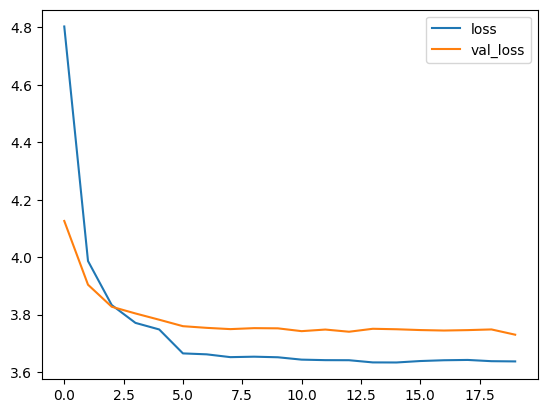

In [ ]:
hist_df = pd.DataFrame(model_2_history.history) 
hist_df.loc[:, ["loss", "val_loss"]].plot() 
hist_df[["desen_loss", "elbise_durumu_loss", "yaka_loss", "kalip_loss", "kol_loss"]].plot() 

In [142]:
from matplotlib import pyplot as plt 
import math 

def plot_his_eval(hist_df:pd.DataFrame):
    loss_train = hist_df[list(filter(lambda x: "loss"  in x and "val" not in x, hist_df.columns.to_numpy()))]
    loss_val = hist_df[["val_"+col for col in loss_train.columns]]

    epochs = list(hist_df.index)

    # losses graph 
    n_rows = math.ceil(loss_train.shape[1] / 4)
    fig, axes = plt.subplots(nrows=n_rows, ncols=4, figsize=(10, 8)) 
    
    i = 0
    for row in range(n_rows): 
        n_col = int(loss_train.shape[1] % 4) if row == (n_rows-1) else 4 
        for col in range(n_col):
            axes[row, col].plot(epochs, loss_train.iloc[:, i], label="train")
            axes[row, col].plot(epochs, loss_val.iloc[:, i], label="val") 

            axes[row, col].set_xlabel('epochs')
            axes[row, col].set_ylabel('loss')
            axes[row, col].set_title(f"{loss_train.columns[i]} vs {loss_val.columns[i]}", fontsize=8)
            axes[row, col].legend(loc='upper right')
            i = i + 1 

    plt.tight_layout()
    plt.show() 
   

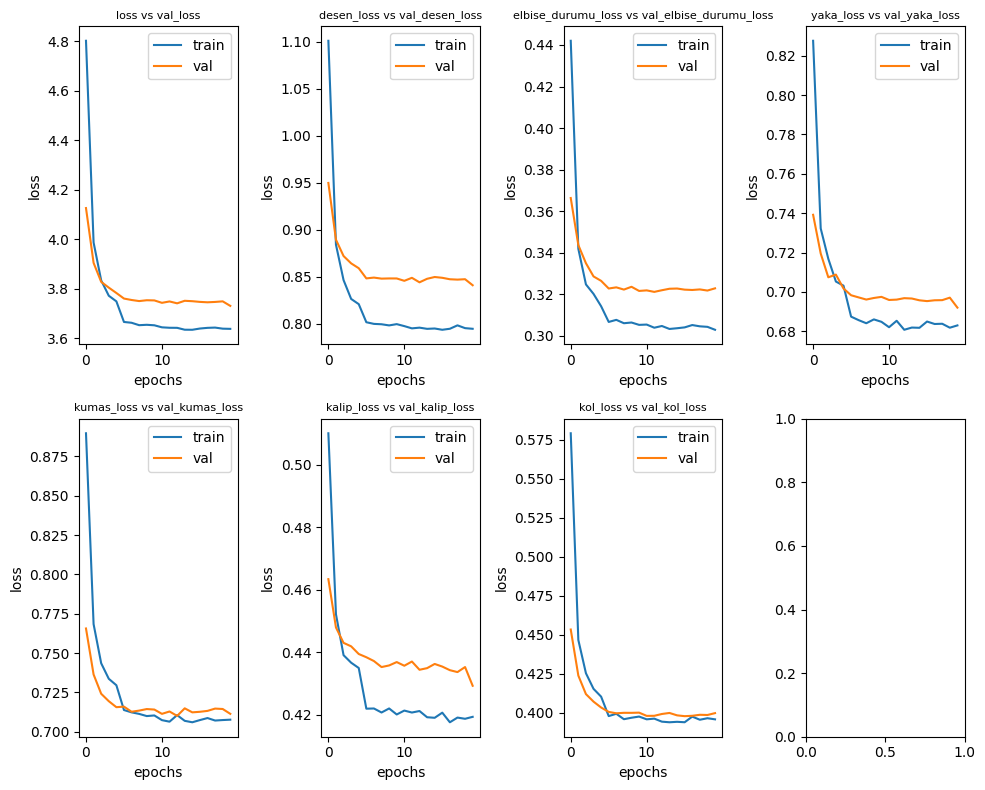

In [143]:
plot_his_eval(hist_df)

# Model 3.3 Efficient Net B0 Particularly Regularized 

In [15]:
eff_net = tf.keras.applications.EfficientNetB0(include_top=False) 
eff_net.trainable = False 

In [16]:
inputs = tf.keras.layers.Input(shape=(224, 224, 3)) 
x = eff_net(inputs) 
x = tf.keras.layers.GlobalAveragePooling2D()(x) 

output_desen = tf.keras.layers.Dense(DESEN_NR_NEURON, activation=tf.keras.activations.softmax, kernel_regularizer = tf.keras.regularizers.l2(1),  name="desen")(x)
output_elbise_durumu = tf.keras.layers.Dense(ELBISE_DURUMU_NR_NEURON, activation=tf.keras.activations.softmax, kernel_regularizer = tf.keras.regularizers.l2(0.1),  name="elbise_durumu")(x)
output_yaka = tf.keras.layers.Dense(YAKA_NR_NEURON, activation=tf.keras.activations.softmax,kernel_regularizer = tf.keras.regularizers.l2(0.1),  name="yaka")(x)
output_kumas = tf.keras.layers.Dense(KUMAS_NR_NEURON, activation=tf.keras.activations.softmax,kernel_regularizer = tf.keras.regularizers.l2(0.01),  name="kumas")(x)
output_kalip = tf.keras.layers.Dense(KALIP_NR_NEURON, activation=tf.keras.activations.softmax,kernel_regularizer = tf.keras.regularizers.l2(0.1),  name="kalip")(x)
output_kol = tf.keras.layers.Dense(KOL_NR_NEURON, activation=tf.keras.activations.softmax,kernel_regularizer = tf.keras.regularizers.l2(0.01),  name="kol")(x)

model_3 = tf.keras.Model(inputs=inputs, outputs=[output_desen, output_elbise_durumu, output_yaka, output_kumas, output_kalip, output_kol], name="Ayd-Net-2") 

In [17]:
loss={
    'desen': 'categorical_crossentropy',
    'elbise_durumu': 'categorical_crossentropy',
    'yaka': 'categorical_crossentropy',
    'kumas': 'categorical_crossentropy',
    'kalip': 'categorical_crossentropy',
    'kol': 'categorical_crossentropy'
}

metrics={
    'desen': [tf.keras.metrics.Precision(name="precision"), tf.keras.metrics.Recall(name="recall")], 
    'elbise_durumu': [tf.keras.metrics.Precision(name="precision"), tf.keras.metrics.Recall(name="recall")],
    'yaka': [tf.keras.metrics.Precision(name="precision"), tf.keras.metrics.Recall(name="recall")],
    'kumas': [tf.keras.metrics.Precision(name="precision"), tf.keras.metrics.Recall(name="recall")],
    'kalip': [tf.keras.metrics.Precision(name="precision"), tf.keras.metrics.Recall(name="recall")],
    'kol': [tf.keras.metrics.Precision(name="precision"), tf.keras.metrics.Recall(name="recall")]
}

In [18]:
model_3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=3e-4), 
                loss=loss, 
                metrics=metrics) 

In [19]:
checkpoint_path = "./checkpoints/multi_outputs_models/model_3_failure/checkpoint-{epoch:01d}.ckpt" 
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True,
                                                         save_best_only=False,
                                                         verbose=1) 

def decay_schedule(epoch, lr):
    # decay by 0.1 every 5 epochs; use `% 1` to decay after each epoch
    if (epoch % 5 == 0) and (epoch != 0):
        lr = lr * 0.1
    return lr

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(decay_schedule)                                                        

In [20]:
Xy_train = pd.concat([X_train, y_train], axis=1)
Xy_test = pd.concat([X_test, y_test], axis=1)
data_gen = CustomDataGenerator(Xy_train, Xy_test)
epoch = 20 
batch_size = 64

model_3_history = model_3.fit(
            data_gen.generate_image(True, batch_size=batch_size, epoch=epoch), 
            steps_per_epoch=np.floor(len(Xy_train) / batch_size), 
            epochs=epoch, 
            validation_data=data_gen.generate_image(False, batch_size=batch_size, epoch=epoch), 
            validation_steps=np.floor(len(Xy_test) / batch_size), 
            callbacks=[checkpoint_callback, lr_scheduler])

Epoch 1/20
 37/187 [====>.........................] - ETA: 6:32 - loss: 20.1636 - desen_loss: 1.8506 - elbise_durumu_loss: 0.8146 - yaka_loss: 1.1995 - kumas_loss: 1.2388 - kalip_loss: 0.6830 - kol_loss: 1.0014 - desen_precision: 0.0000e+00 - desen_recall: 0.0000e+00 - elbise_durumu_precision: 0.7654 - elbise_durumu_recall: 0.4945 - yaka_precision: 0.6082 - yaka_recall: 0.0878 - kumas_precision: 0.6903 - kumas_recall: 0.3530 - kalip_precision: 0.7924 - kalip_recall: 0.7496 - kol_precision: 0.5798 - kol_recall: 0.2454

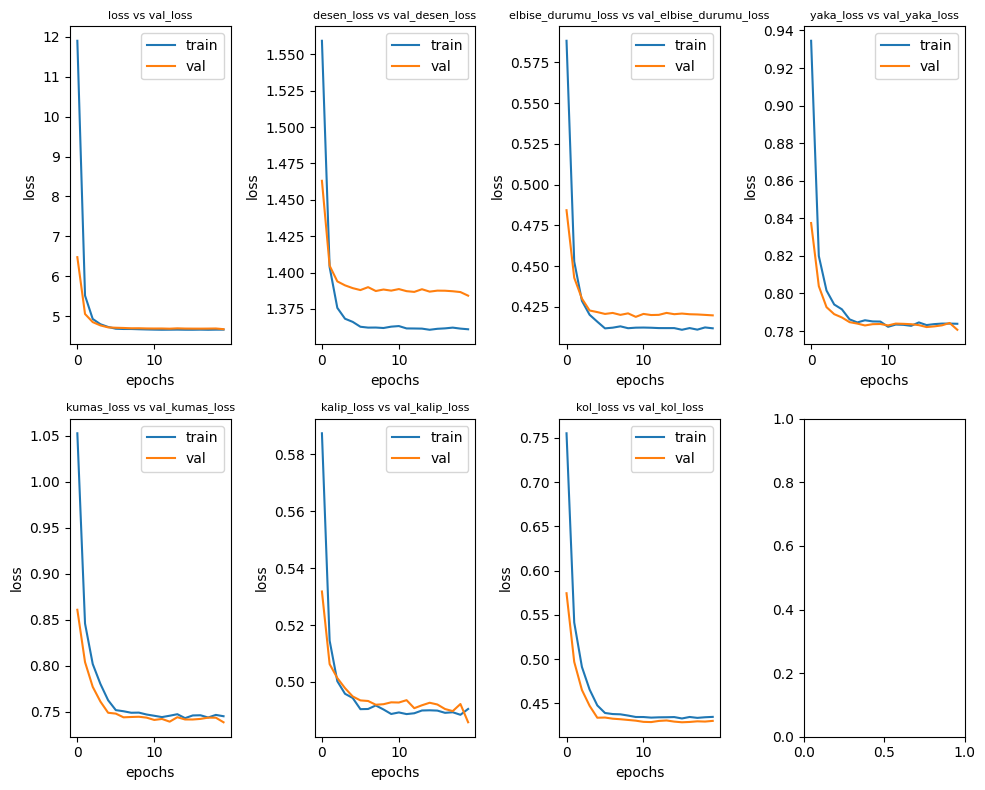

In [171]:
hist_df_3 = pd.DataFrame(model_3_history.history)
plot_his_eval(hist_df_3)

### Fine Tune

In [175]:
eff_net.trainable = True  

for layer in eff_net.layers[:-5]:
    layer.trainable = False 

model_3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=3e-4),
              loss=loss, 
              metrics=metrics)

In [176]:
Xy_train = pd.concat([X_train, y_train], axis=1)
Xy_test = pd.concat([X_test, y_test], axis=1)
data_gen = CustomDataGenerator(Xy_train, Xy_test)
epoch = 40 
batch_size = 64

model_3_history_fine = model_3.fit(
            data_gen.generate_image(True, batch_size=batch_size, epoch=epoch), 
            steps_per_epoch=np.floor(len(Xy_train) / batch_size), 
            initial_epoch=20,
            epochs=epoch, 
            validation_data=data_gen.generate_image(False, batch_size=batch_size, epoch=epoch), 
            validation_steps=np.floor(len(Xy_test) / batch_size), 
            callbacks=[checkpoint_callback, lr_scheduler])

Epoch 21/40
187/187 [==============================] - ETA: 0s - loss: 5.0759 - desen_loss: 1.4619 - elbise_durumu_loss: 0.4565 - yaka_loss: 0.8446 - kumas_loss: 0.8482 - kalip_loss: 0.5652 - kol_loss: 0.4464 - desen_precision: 0.9241 - desen_recall: 0.0244 - elbise_durumu_precision: 0.8986 - elbise_durumu_recall: 0.7624 - yaka_precision: 0.7886 - yaka_recall: 0.4527 - kumas_precision: 0.7772 - kumas_recall: 0.5703 - kalip_precision: 0.8526 - kalip_recall: 0.7579 - kol_precision: 0.8684 - kol_recall: 0.7926
Epoch 21: saving model to ./checkpoints/multi_outputs_models/model_3_newLR\checkpoint-21.ckpt
187/187 [==============================] - 441s 2s/step - loss: 5.0759 - desen_loss: 1.4619 - elbise_durumu_loss: 0.4565 - yaka_loss: 0.8446 - kumas_loss: 0.8482 - kalip_loss: 0.5652 - kol_loss: 0.4464 - desen_precision: 0.9241 - desen_recall: 0.0244 - elbise_durumu_precision: 0.8986 - elbise_durumu_recall: 0.7624 - yaka_precision: 0.7886 - yaka_recall: 0.4527 - kumas_precision: 0.7772 - ku

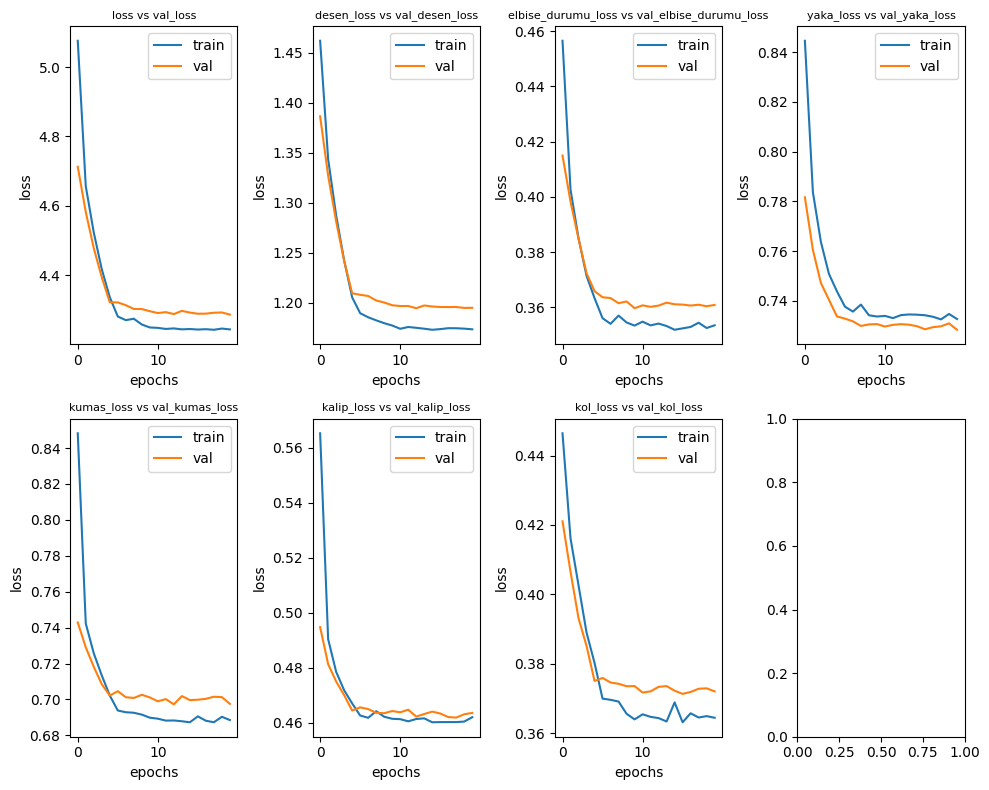

In [177]:
hist_df_3_fine = pd.DataFrame(model_3_history_fine.history)

plot_his_eval(hist_df_3_fine)

In [ ]:
def plot_his_eval(hist_df:pd.DataFrame):
    loss_train = hist_df[list(filter(lambda x: "loss"  in x and "val" not in x, hist_df.columns.to_numpy()))]
    loss_val = hist_df[["val_"+col for col in loss_train.columns]]

    epochs = list(hist_df.index)

    # losses graph 
    n_rows = math.ceil(loss_train.shape[1] / 4)
    fig, axes = plt.subplots(nrows=n_rows, ncols=4, figsize=(10, 8)) 
    
    i = 0
    for row in range(n_rows): 
        n_col = int(loss_train.shape[1] % 4) if row == (n_rows-1) else 4 
        for col in range(n_col):
            axes[row, col].plot(epochs, loss_train.iloc[:, i], label="train")
            axes[row, col].plot(epochs, loss_val.iloc[:, i], label="val") 

            axes[row, col].set_xlabel('epochs')
            axes[row, col].set_ylabel('loss')
            axes[row, col].set_title(f"{loss_train.columns[i]} vs {loss_val.columns[i]}", fontsize=8)
            axes[row, col].legend(loc='upper right')
            i = i + 1 

    plt.tight_layout()
    plt.show() 

## With Dropout 